In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
mydata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3600/Edu and Income data.csv")
I=mydata.Edu.nunique()
J=mydata.Company.nunique()
F=pd.get_dummies(mydata.Edu).to_numpy()
B=pd.get_dummies(mydata.Company).to_numpy()
n=F.shape[0]
x=np.c_[np.ones(n),F[:,[2,1]],B[:,0:3]]
y=mydata.Income.to_numpy()

In [3]:
sst=sum((y-y.mean())**2)
dft=n-1

In [4]:
ixtx=np.linalg.inv(x.T @ x)
beta=ixtx @ x.T @ y
yhat=x @ beta
res=y-yhat
sse=np.sum(res**2)
dfe=n-I-J+1
mse=sse/dfe

In [5]:
mu=beta[0]
tau=np.append(beta[1:3],0)
gamma=np.append(beta[3:6],0)
means=(mu+np.add.outer(tau,gamma)).T
means

array([[ 8445.83333333, 10177.08333333, 15427.08333333],
       [ 6145.83333333,  7877.08333333, 13127.08333333],
       [13754.16666667, 15485.41666667, 20735.41666667],
       [ 4829.16666667,  6560.41666667, 11810.41666667]])

In [9]:
I,J

(3, 4)

In [13]:
x1=x[:,[0,3,4,5]]
ixtx1=np.linalg.inv(x1.T @ x1)
beta1=ixtx1 @ x1.T @ y
yhat=x1 @ beta1
res=y-yhat
sse1=np.sum(res**2)

ssEdu=sse1-sse
dfEdu=I-1
msEdu=ssEdu/dfEdu
fRatio=msEdu/mse
pvalue=1-stats.f(dfEdu,dfe).cdf(fRatio)

ssBlk=sst-sse-ssEdu
dfBlk=dft-dfe-dfEdu
print (f"{'source':<12} {'ss':>12} {'df':>3} {'ms':>12} {'F':>5} {'p-value':>7}")
print (f"{'Block':<12} {ssBlk:12.2f} {dfBlk:>3}")
print (f"{'Edu':<12} {ssEdu:12.2f} {dfEdu:>3} {msEdu:12.2f} {fRatio:5.2f} {pvalue:7.4f}")
print (f"{'error':<12} {sse:12.2f} {dfe:>3} {mse:12.2f}")
print (f"{'total':<12} {sst:12.2f} {dft:>3}")

source                 ss  df           ms     F p-value
Block        278736979.17   3
Edu          211460208.33   2 105730104.17 16.95  0.0001
error        112255208.33  18   6236400.46
total        602452395.83  23


In [14]:
x2=x[:,[0,1,2]]
ixtx2=np.linalg.inv(x2.T @ x2)
beta2=ixtx2 @ x2.T @ y
yhat=x2 @ beta2
res=y-yhat
sse2=np.sum(res**2)
dfe2=n-I
mse2=sse2/dfe2
ssr=sst-sse2
dfr=dft-dfe2
msr=ssr/dfr
fRatio=msr/mse2
pvalue=1-stats.f(dfr,dfe2).cdf(fRatio)

print (f"{'source':<12} {'ss':>12} {'df':>3} {'ms':>12} {'F':>5} {'p-value':>7}")
print (f"{'Edu':<12} {ssr:12.2f} {dfr:>3} {msr:12.2f} {fRatio:5.2f} {pvalue:7.4f}")
print (f"{'error':<12} {sse2:12.2f} {dfe2:>3} {mse2:12.2f}")
print (f"{'total':<12} {sst:12.2f} {dft:>3}")

source                 ss  df           ms     F p-value
Edu          211460208.33   2 105730104.17  5.68  0.0107
error        390992187.50  21  18618675.60
total        602452395.83  23


In [ ]:
mu2=beta2[0]
tau2=np.append(beta2[1:3],0)
means2=mu2+tau2

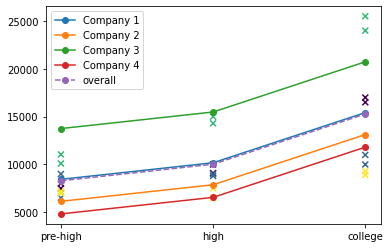

In [ ]:
lbl=mydata.Edu.unique()
plt.scatter(mydata.Edu, mydata.Income, c = pd.Categorical(mydata.Company).codes, marker='x')
plt.plot(lbl, means[0,:],label='Company 1',marker='o')
plt.plot(lbl, means[1,:],label='Company 2',marker='o')
plt.plot(lbl, means[2,:],label='Company 3',marker='o')
plt.plot(lbl, means[3,:],label='Company 4',marker='o')
plt.plot(lbl, means2,label='overall',marker='o',linestyle='--')
plt.legend(loc="upper left")
plt.show()

In [ ]:
varBeta=mse *ixtx
a=np.array([0,1/2,1/2,0,0,0])
l=a @ beta
sel=np.sqrt(a @ varBeta @a)
myt=stats.t(dfe).ppf(.975)
l,sel,[l-myt*sel,l+myt*sel]

(-6115.624999999996,
 1081.3533589005747,
 [-8387.464105002808, -3843.785894997186])